# Réseau de neurones pour la régression

Nous allons ici appliquer un réseau de neurones à un problème de régression. Nous allons essayer de faire un modèle pour estimer les prix des appartements en Suisse. Pour cela, nous utilisons un jeu de données construit à partir d'annonces d'appartements pour la location. Ce jeu de données contient notamment le nombre de pièces, la surface habitable en mètres carrés, la latitude, longitude et évidemment le loyer par mois en francs.

Pour comparaison, nous allons également faire un modèle de régression linéaire.

## Lecture des données

In [2]:
d = read.table(file="data/appartements.tsv", header=TRUE, sep="\t")

In [4]:
head(d)

adv_id,lat,lng,nombre_pieces,surface_habitable,loyer_mois
100513760,47.36522,8.564631,1.0,30,2300
101524704,47.35651,7.984905,4.5,87,1390
102182223,46.20270,6.165245,3.0,60,3200
102194975,47.56210,7.591099,3.0,70,1670
102532546,47.56210,7.591099,3.0,70,1670
102593911,47.47659,9.490726,3.5,100,1570


In [8]:
summary(d)

     adv_id               lat             lng         nombre_pieces   
 Min.   :100513760   Min.   :45.83   Min.   : 5.973   Min.   : 1.000  
 1st Qu.:103367455   1st Qu.:47.14   1st Qu.: 7.591   1st Qu.: 2.500  
 Median :103388948   Median :47.37   Median : 8.415   Median : 3.500  
 Mean   :103375009   Mean   :47.24   Mean   : 8.132   Mean   : 3.457  
 3rd Qu.:103402957   3rd Qu.:47.47   3rd Qu.: 8.620   3rd Qu.: 4.500  
 Max.   :103429689   Max.   :47.76   Max.   :10.343   Max.   :14.000  
 surface_habitable   loyer_mois   
 Min.   : 15.00    Min.   :  115  
 1st Qu.: 61.00    1st Qu.: 1300  
 Median : 81.00    Median : 1670  
 Mean   : 86.02    Mean   : 1887  
 3rd Qu.:105.00    3rd Qu.: 2180  
 Max.   :400.00    Max.   :15000  

In [30]:
nrow(d)

[1] 14572

Nous avons les données pour presque 15'000 appartements.

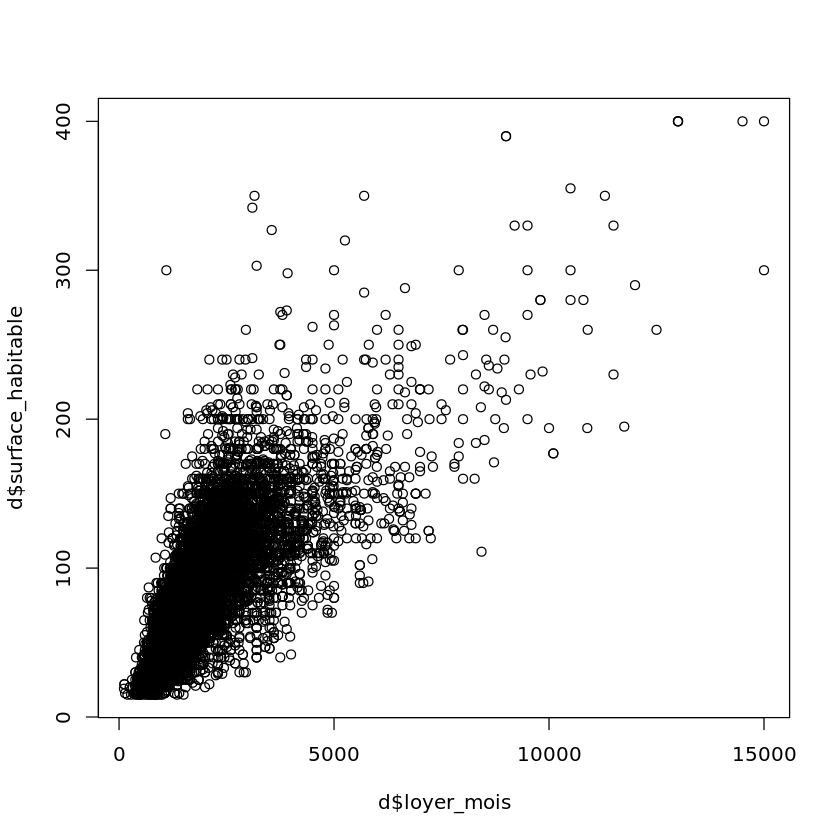

In [7]:
plot(d$loyer_mois, d$surface_habitable)

## Préparation du jeu de données

Il est important de normaliser les données avant d'entraîner un réseau de neurones. Si les données ne sont pas normalisées, le réseau a plus de difficultés de converger vers un résultat acceptable.

Il y a beaucoup de façons de normaliser les données dans R. Le but est de faire en sorte que pour chaque variable, les valeurs se situent entre 0 et 1 (ou parfois entre -1 et 1).

Dans un premier temps, nous calculons les valeurs minimum et maximum pour chaque variable dans notre jeu de données (à part la première colonne qui est l'identifiant unique de l'appartement):

In [23]:
maxs = apply(d[,2:6], 2, max)
mins = apply(d[,2:6], 2, min)

In [24]:
maxs

lat               lng     nombre_pieces surface_habitable 
         47.76457          10.34274          14.00000         400.00000 
       loyer_mois 
      15000.00000

In [25]:
mins

lat               lng     nombre_pieces surface_habitable 
        45.832319          5.973495          1.000000         15.000000 
       loyer_mois 
       115.000000

Nous pouvons maintenant normaliser nos données. En gros, pour une valeur `x` donnée, nous faisons le calcul `(x - min) / (max - min)`, et ceci pour chaque valeur et pour toutes les variables (les valeurs minimales et maximales sont par variable évidemment).

La fonction `scale` permet de faire cette opération pour toutes les variables en même temps:

In [26]:
dnorm = as.data.frame(scale(d[,2:6], center=mins, scale=maxs-mins))

In [27]:
head(dnorm)

lat,lng,nombre_pieces,surface_habitable,loyer_mois
0.7933241,0.5930398,0.0000000,0.03896104,0.14679207
0.7888190,0.4603564,0.2692308,0.18701299,0.08565670
0.1916840,0.0438863,0.1538462,0.11688312,0.20725563
0.8952184,0.3702251,0.1538462,0.14285714,0.10446758
0.8952184,0.3702251,0.1538462,0.14285714,0.10446758
0.8509632,0.8049974,0.1923077,0.22077922,0.09774941


## Régression linéaire

Essayons de faire une simple régression multiple pour estimer le loyer des appartements. En principe, nous pouvons utiliser les données sans normalisation pour une régression linéaire. Cepedant, puisque nous allons comparer le résultat avec celui d'un réseau de neurones, nous utilisons dores et déjà les valeurs normalisées.

In [28]:
regmul = lm(loyer_mois ~ surface_habitable + nombre_pieces, data=dnorm)
summary(regmul)


Call:
lm(formula = loyer_mois ~ surface_habitable + nombre_pieces, 
    data = dnorm)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36138 -0.02120 -0.00556  0.01134  0.58801 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.0232717  0.0008435  27.590   <2e-16 ***
surface_habitable  0.5881615  0.0071952  81.744   <2e-16 ***
nombre_pieces     -0.0674119  0.0071875  -9.379   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04638 on 14569 degrees of freedom
Multiple R-squared:  0.5663,	Adjusted R-squared:  0.5663 
F-statistic:  9513 on 2 and 14569 DF,  p-value: < 2.2e-16


Les résultat est une régression avec un $R^2$ de 0.56. Nous voyons par ailleurs que le facteur principal pour le loyer d'un appartement et la surface habitable. Le nombre de pièces a un petit effect négatif (un appartement avec plus de pièces étant un peu moins cher qu'un appartement de même taille mais moins de pièces).

Nous pouvons encore essayer d'inclure l'effet de la localisation. En effet, nous pouvons penser qu'en fonction de la localisation de l'appartement, le loyer pourrait varier. Nous pouvons faire ceci en simplement incluant les coordonnées géographiques:

In [29]:
regmulloc = lm(loyer_mois ~ surface_habitable + nombre_pieces + lat + lng, data=dnorm)
summary(regmulloc)


Call:
lm(formula = loyer_mois ~ surface_habitable + nombre_pieces + 
    lat + lng, data = dnorm)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35988 -0.02115 -0.00506  0.01176  0.57684 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.045364   0.001747  25.962   <2e-16 ***
surface_habitable  0.588872   0.007155  82.302   <2e-16 ***
nombre_pieces     -0.069518   0.007139  -9.738   <2e-16 ***
lat               -0.026028   0.002349 -11.082   <2e-16 ***
lng               -0.005903   0.002562  -2.304   0.0212 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04606 on 14567 degrees of freedom
Multiple R-squared:  0.5725,	Adjusted R-squared:  0.5723 
F-statistic:  4876 on 4 and 14567 DF,  p-value: < 2.2e-16


On arrive effectivement à expliquer un peu plus de variance, avec un $R^2$ de 0.57. Cependant, la différence est quand-même minime. Nous voyons aussi que la longitude n'a quasiment pas d'effet, et la latitude seulement un effet minimal. Plus on va au Sud, plus les appartements sont un poil plus cher selon ce modèle.

## Réseau de neurones

Avec un réseau de neurones on doit séparer notre jeu de données en jeu d'entrainement et jeu de test, comme on l'avait déjà fait pour la régression logistique. Vu que nous avons un nombre plus important de données, nous pouvons réserver 25% des données pour le test, et utiliser seulement 75% pour l'entrainement:

In [32]:
idx = sample(nrow(dnorm), size=0.75*nrow(dnorm))
dtrain = dnorm[idx,]
dtest = dnorm[-idx,]

In [33]:
c(nrow(dtrain), nrow(dtest))

[1] 10929  3643

Nous avons donc environ 11'000 appartements pour l'entrainement et 3600 pour tester les modèle.

Nous allons utiliser le package `neuralnet` pour construire notre réseau de neurones. Nous allons utiliser un autre package, `caret` pour calculer le $R^2$ à travers la fonction `postResample`.

In [57]:
library(neuralnet)
library(caret)

Nous construisons un réseau avec deux couches, la première avec 8 neurones et la deuxième avec 4 neurones. L'entrainement peut prendre un petit moment...

In [55]:
nn = neuralnet(
    loyer_mois ~ surface_habitable + nombre_pieces,
    data=dtrain,
    hidden=c(30,10),
    linear.output=TRUE
)

Nous calculons maintenant les prédictions (donc l'estimation du loyer) pour le jeu de donneés test.

In [58]:
pred_nn = predict(nn, dtest)

Nous allons maintenant calculer le $R^2$ pour pouvoir comparer avec la régression multiple. Pour cela, nous allons calculer le loyer par mois non normalisé, à la fois les valeurs estimées par le modèle et les valeurs réelles, pour le jeu de données test:

In [59]:
yhat = pred_nn * (max(d$loyer_mois) - min(d$loyer_mois)) + min(d$loyer_mois)

In [60]:
y = dtest[,5] * (max(d$loyer_mois) - min(d$loyer_mois)) + min(d$loyer_mois)

Nous pouvons maintenant estimer le $R^2$ avec la fonction `postResample`:

In [61]:
postResample(yhat, y)

RMSE    Rsquared         MAE 
692.3622364   0.5864121 405.7688341

Nous obtenons une valeur d'environ 0.58, donc un peu meilleur mais loin d'être bon.

À partir de là, vous pouvez essayer de changer un peu l'architecture du réseau, ou encore d'enlever des variables, afin d'optimiser le modèle.